,Species,"pH (NBS scale, Potentiometric)",Temp [°C],Sal,AT [µmol/kg] (Potentiometric titration),Omega Arg (Calculated using CO2SYS),Size (clam size class (mm)),Flow speed [m/s],Perc [%] (clams burrowed),Perc [%] (clams dispersed),CSC flag (Calculated using seacarb afte...),"pH (total scale, Calculated using...)",CO2 [µmol/kg] (Calculated using seacarb afte...),pCO2water_SST_wet [µatm] (Calculated using seacarb afte...),fCO2water_SST_wet [µatm] (Calculated using seacarb afte...),[HCO3]- [µmol/kg] (Calculated using seacarb afte...),[CO3]2- [µmol/kg] (Calculated using seacarb afte...),DIC [µmol/kg] (Calculated using seacarb afte...),Omega Arg (Calculated using seacarb afte...),Omega Cal (Calculated using seacarb afte...)
0,Mya arenaria (mollusk),7.48,17.5,32.6,3379.97,1.02,0.5-1.5,0.11,NaN,26.7,26,7.36,120,3411,3399,3248,57,3425,0.89,1.39
1,Mya arenaria (mollusk),6.94,17.6,32.8,3403.51,0.28,1.6-2.5,0.11,NaN,40.0,26,6.82,429,12255,12213,3364,17,3810,0.27,0.42
2,Mya arenaria (mollusk),7.30,17.6,32.5,3324.92,0.65,1.6-2.5,0.23,NaN,50.0,26,7.18,181,5158,5140,3238,38,3456,0.59,0.91
3,Mya arenaria (mollusk),7.64,17.6,32.5,3338.13,1.48,0.5-1.5,0.11,NaN,16.7,26,7.52,80,2294,2286,3153,80,3314,1.25,1.95
4,Mya arenaria (mollusk),7.08,17.6,32.5,3427.60,0.39,1.6-2.5,0.23,NaN,53.3,26,6.96,313,8921,8890,3373,24,3710,0.37,0.57
5,Mya arenaria (mollusk),7.76,17.6,32.4,3211.01,1.87,0.5-1.5,0.23,NaN,26.7,26,7.64,58,1645,1639,2980,100,3137,1.56,2.42
6,Mya arenaria (mollusk),7.20,17.6,32.4,3416.45,0.52,0.5-1.5,0.23,NaN,60.0,26,7.08,235,6716,6692,3346,31,3612,0.48,0.75
7,Mya arenaria (mollusk),7.30,17.5,32.5,3315.20,0.64,0.5-1.5,0.11,NaN,16.7,26,7.18,181,5137,5120,3229,37,3447,0.58,0.91
8,Mya arenaria (mollusk),7.48,17.5,32.4,3461.37,1.04,1.6-2.5,0.11,NaN,6.7,26,7.36,123,3499,3487,3328,58,3509,0.91,1.41
9,Mya arenaria (mollusk),7.13,17.6,32.4,3217.45,0.42,1.6-2.5,0.23,NaN,60.0,26,7.01,261,7453,7427,3160,25,3446,0.39,0.60


22    7.39
23    7.71
26    6.97
27    6.93
29    7.51
32    7.35
34    7.13
37    7.62
38    7.51
40    7.60
Name: pH (NBS scale, Potentiometric), dtype: float64

22    43.3
23    70.0
26    56.7
27    33.3
29    60.0
32    33.3
34    26.7
37    60.0
38    60.0
40    46.7
Name: Perc [%] (clams burrowed), dtype: float64

osmall_array : <PandasArray>
[0.91, 0.47, 0.42, 0.44, 0.76, 1.82, 0.45, 0.21, 1.5, 0.23, 0.58]
Length: 11, dtype: float64


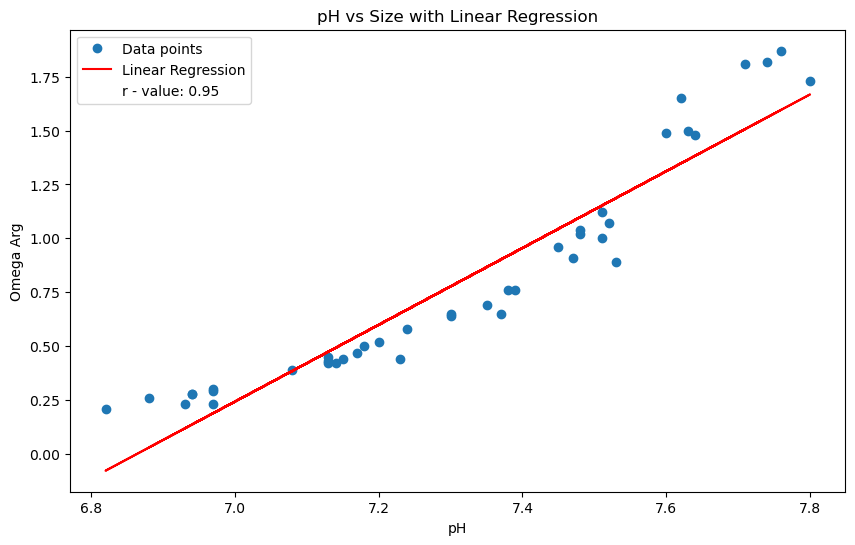

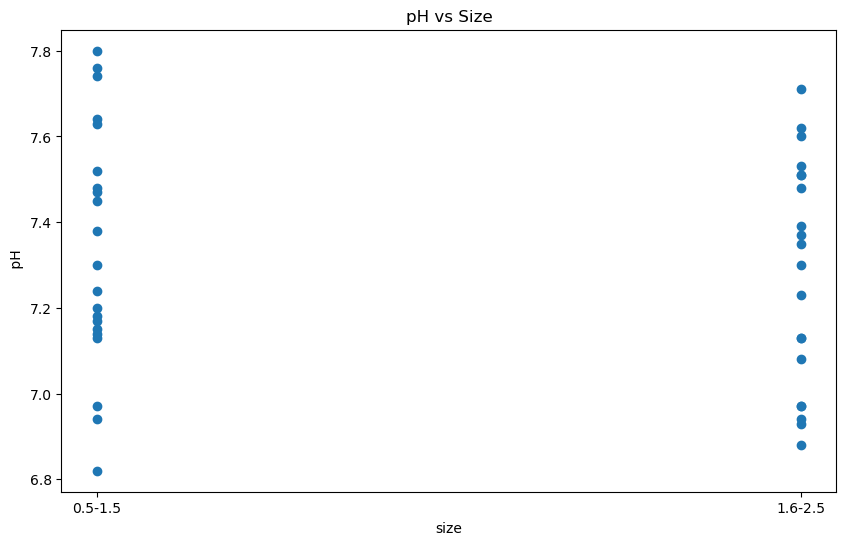

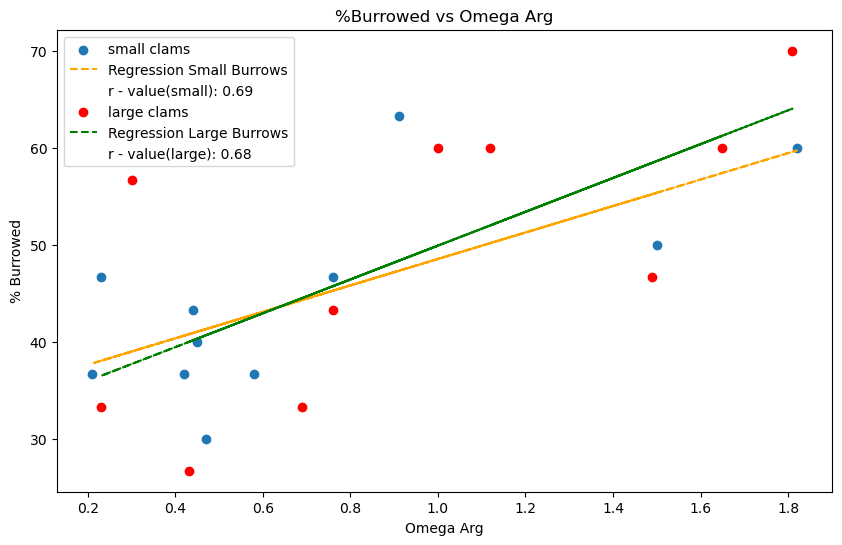

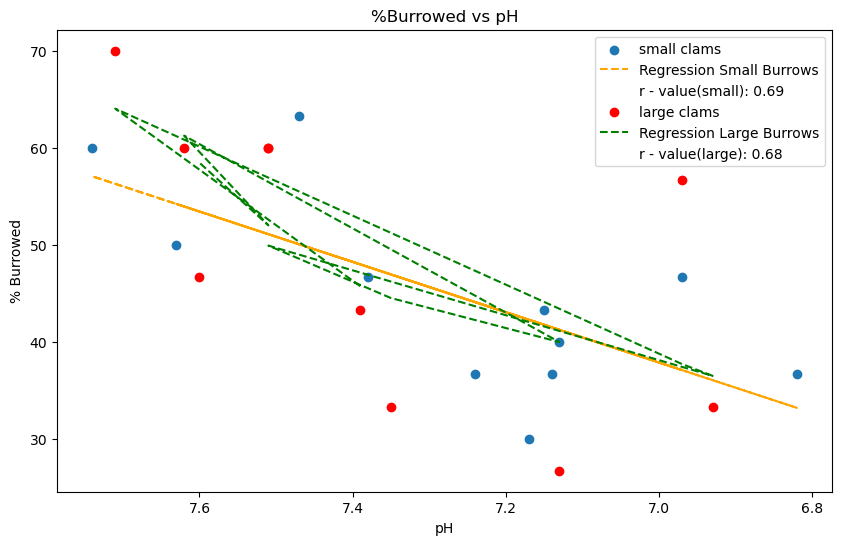

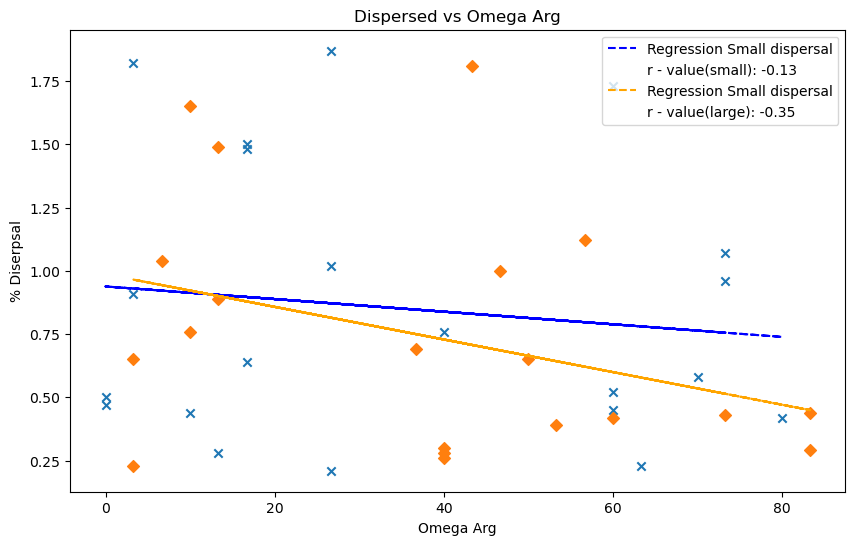

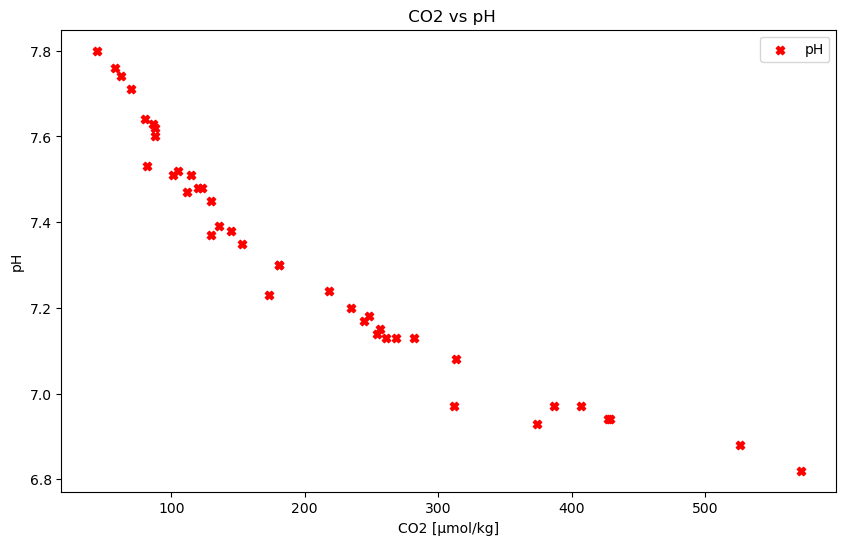

In [105]:
import numpy as np
import netCDF4
import pandas as pd
from scipy import interpolate, stats
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

filepath = "Clements_2014.tab"
data = pd.read_csv(filepath, sep='\t', header = 'infer', skiprows=34)

display(data)


# fields = ['Species','pH','Temp','Sal','AT','Omega Arg','Size','Flow Speed','Per burrowed','perc dispersed','csc flag','ph cal','CO2','pCo2water','fCO2water_wet','[HCO3]-','[CO3]2-','DIC','Omega Arg_cal','Omega cal']
# data = pd.read_csv(filepath, delimiter='\t', skiprows=range(1, 35),names=fields)
# display(data)
pH = data['pH (NBS scale, Potentiometric)']
size = data['Size (clam size class (mm))']
hco3 = data['[HCO3]- [µmol/kg] (Calculated using seacarb afte...)']
omega_arg = data['Omega Arg (Calculated using CO2SYS)']
disperse= data['Perc [%] (clams dispersed)']
co3 = data['[CO3]2- [µmol/kg] (Calculated using seacarb afte...)']
co2 = data['CO2 [µmol/kg] (Calculated using seacarb afte...)']


pH_array = data['pH (NBS scale, Potentiometric)'].values
omega_arg_array = data['Omega Arg (Calculated using CO2SYS)'].values

#pH and Omega Arg#################################################
slope, intercept, r_value, p_value, std_err = stats.linregress(pH_array,omega_arg_array)

regression_line = slope * pH_array + intercept
fig, axs = plt.subplots(figsize=(10, 6))
axs.plot(pH_array,omega_arg_array,  marker='o', linestyle='', label='Data points')

# Plot the linear regression line

axs.plot(pH_array, regression_line, color='red', label='Linear Regression')
axs.plot([], [], ' ', label=f'r - value: {round(r_value, 2)}') 
axs.set_title('pH vs Size with Linear Regression')
axs.set_xlabel('pH')
axs.set_ylabel('Omega Arg')
axs.legend()

# Plotting pH vs size using a line plot
fig, axs = plt.subplots(figsize=(10, 6))

axs.scatter(size,pH,  marker='o', linestyle='-')
axs.set_title('pH vs Size')
axs.set_xlabel('size')
axs.set_ylabel(' pH')

#speerate the size of the clams###################
burrow =data[data['Perc [%] (clams burrowed)'].notna()]['Perc [%] (clams burrowed)']
pH_burrow_s =data[(data['Perc [%] (clams burrowed)'].notna()) & (data["Size (clam size class (mm))"] == "0.5-1.5")]["pH (NBS scale, Potentiometric)"]
pH_burrow_l =data[(data['Perc [%] (clams burrowed)'].notna()) & (data["Size (clam size class (mm))"] == "1.6-2.5")]["pH (NBS scale, Potentiometric)"]
display(pH_burrow_l)
display(burrow_large)
omega_small =data[(data['Perc [%] (clams burrowed)'].notna()) & (data["Size (clam size class (mm))"] == "0.5-1.5")]['Omega Arg (Calculated using CO2SYS)']
omega_large =data[(data['Perc [%] (clams burrowed)'].notna()) & (data["Size (clam size class (mm))"] == "1.6-2.5")]['Omega Arg (Calculated using CO2SYS)']

burrow_small = data[(data['Perc [%] (clams burrowed)'].notna()) & (data["Size (clam size class (mm))"] == "0.5-1.5")]['Perc [%] (clams burrowed)']
burrow_large = data[(data['Perc [%] (clams burrowed)'].notna()) & (data["Size (clam size class (mm))"] == "1.6-2.5")]['Perc [%] (clams burrowed)']

#pH and size data cleaning 
pH_small = data[(data["Size (clam size class (mm))"] == "0.5-1.5")]["pH (NBS scale, Potentiometric)"]
pH_large = data[(data["Size (clam size class (mm))"] == "1.6-2.5")]["pH (NBS scale, Potentiometric)"]
pH_small_np = data[(data["Size (clam size class (mm))"] == "0.5-1.5")]["pH (NBS scale, Potentiometric)"].to_numpy()
small_clam = data[(data["Size (clam size class (mm))"] == "0.5-1.5")]["Size (clam size class (mm))"]
#plot two different sizes on omega arg and burrow##############
osmall_array = omega_small.array
olarge_array = omega_large.array
bsmall_array=burrow_small.array
bsmall_array=burrow_large.array
print("osmall_array :" , osmall_array )

#slope, intercept, r_value, p_value, std_err = stats.linregress(osmall_array, bsmall_array)

#burrowing and Omega Arg#############################
fig, axs = plt.subplots(figsize=(10, 6))

axs.scatter(omega_small ,burrow_small, label='small clams', marker='o')
slope_small, intercept_small,r_small, _, _ = stats.linregress(omega_small, burrow_small)
regression_line_small = slope_small * omega_small + intercept_small
axs.plot(omega_small, regression_line_small, color='orange', linestyle='--', label='Regression Small Burrows')

axs.plot([], [], ' ', label=f'r - value(small): {round(r_small, 2)}') 

axs.scatter(omega_large ,burrow_large,label='large clams', marker='o', color = 'red')
slope_large, intercept_large, r_large, _, _ = stats.linregress(omega_large, burrow_large)
regression_line_large = slope_large * omega_large + intercept_large
axs.plot(omega_large, regression_line_large, color='green', linestyle='--', label='Regression Large Burrows')
axs.plot([], [], ' ', label=f'r - value(large): {round(r_large, 2)}') 
axs.set_title('%Burrowed vs Omega Arg')
axs.set_xlabel('Omega Arg')
axs.set_ylabel('% Burrowed')
axs.legend()

###### pH and burrowing###############################
fig, axs = plt.subplots(figsize=(10, 6))
axs.scatter(pH_burrow_s ,burrow_small, label='small clams', marker='o')
slope_small_pH, intercept_small_pH,r_small_pH, _, _ = stats.linregress(pH_burrow_s, burrow_small)
regression_pline_small = slope_small_pH * pH_burrow_s + intercept_small_pH
axs.plot(pH_burrow_s, regression_pline_small, color='orange', linestyle='--', label='Regression Small Burrows')

axs.plot([], [], ' ', label=f'r - value(small): {round(r_small, 2)}') 

axs.scatter(pH_burrow_l ,burrow_large,label='large clams', marker='o', color = 'red')
slope_large_pH, intercept_large_pH, r_large_pH, _, _ = stats.linregress(pH_burrow_l, burrow_large)
regression_pline_large = slope_large_pH * pH_burrow_l + intercept_large_pH
axs.plot(pH_burrow_l, regression_line_large, color='green', linestyle='--', label='Regression Large Burrows')
axs.plot([], [], ' ', label=f'r - value(large): {round(r_large, 2)}') 
axs.set_title('%Burrowed vs pH')
axs.set_xlabel('pH')
axs.set_xlim(axs.get_xlim()[::-1])
axs.set_ylabel('% Burrowed')
axs.legend()


###################dispersal data cleaning ###################################
small_dis = data[(data["Size (clam size class (mm))"] == "0.5-1.5")]['Perc [%] (clams dispersed)']
large_dis = data[(data["Size (clam size class (mm))"] == "1.6-2.5")]['Perc [%] (clams dispersed)']

s_om_dis = data[(data["Size (clam size class (mm))"] == "0.5-1.5")]['Omega Arg (Calculated using CO2SYS)']
l_om_dis = data[(data["Size (clam size class (mm))"] == "1.6-2.5")]['Omega Arg (Calculated using CO2SYS)']

fig, axs = plt.subplots(figsize=(10, 6))

axs.scatter(small_dis,s_om_dis, marker='x')
slope_sd, intercept_sd,r_sd, _, _ = stats.linregress(small_dis, s_om_dis)
regression_dis_small = slope_sd * small_dis + intercept_sd
axs.plot(small_dis, regression_dis_small, color='b', linestyle='--', label='Regression Small dispersal')
axs.plot([], [], ' ', label=f'r - value(small): {round(r_sd, 2)}') 
axs.scatter(large_dis,l_om_dis, marker='D')
slope_ld, intercept_ld,r_ld, _, _ = stats.linregress(large_dis, l_om_dis)
regression_dis_lar = slope_ld * large_dis + intercept_ld
axs.plot(large_dis, regression_dis_lar, color='orange', linestyle='--', label='Regression Small dispersal')
axs.plot([], [], ' ', label=f'r - value(large): {round(r_ld, 2)}') 
axs.set_title('Dispersed vs Omega Arg')
axs.set_xlabel('Omega Arg')
axs.set_ylabel('% Diserpsal')
axs.legend()


fig, axs = plt.subplots(figsize=(10, 6))

axs.scatter(co2,pH, color = 'r', marker = 'X', label='pH' )
axs.set_title(' CO2 vs pH')
axs.set_xlabel( 'CO2 [µmol/kg]')
axs.set_ylabel('pH')
axs.legend()
# with open(filepath, 'r') as r:
#     for i in range(77):
#         print(r.readline())

